## Importing the necessary modules

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## To load the dataset

In [3]:
df = pd.read_csv('student_feedback.csv')

## Basic Summary

In [3]:
print(df.head())

   Student ID  Well versed with the subject  \
0         340                             5   
1         253                             6   
2         680                             7   
3         806                             9   
4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                                    5                        4   
3                     

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Student ID                                            1001 non-null   int64
 1   Well versed with the subject                          1001 non-null   int64
 2   Explains concepts in an understandable way            1001 non-null   int64
 3   Use of presentations                                  1001 non-null   int64
 4   Degree of difficulty of assignments                   1001 non-null   int64
 5   Solves doubts willingly                               1001 non-null   int64
 6   Structuring of the course                             1001 non-null   int64
 7   Provides support for students going above and beyond  1001 non-null   int64
 8   Course recommendation based on relevance              1001 non-null   int64
dty

In [5]:
print(df.describe())

        Student ID  Well versed with the subject  \
count  1001.000000                   1001.000000   
mean    500.000000                      7.497502   
std     289.108111                      1.692998   
min       0.000000                      5.000000   
25%     250.000000                      6.000000   
50%     500.000000                      8.000000   
75%     750.000000                      9.000000   
max    1000.000000                     10.000000   

       Explains concepts in an understandable way  Use of presentations  \
count                                 1001.000000           1001.000000   
mean                                     6.081918              5.942058   
std                                      2.597168              1.415853   
min                                      2.000000              4.000000   
25%                                      4.000000              5.000000   
50%                                      6.000000              6.000000   
75%   

# To identify relationships between variables

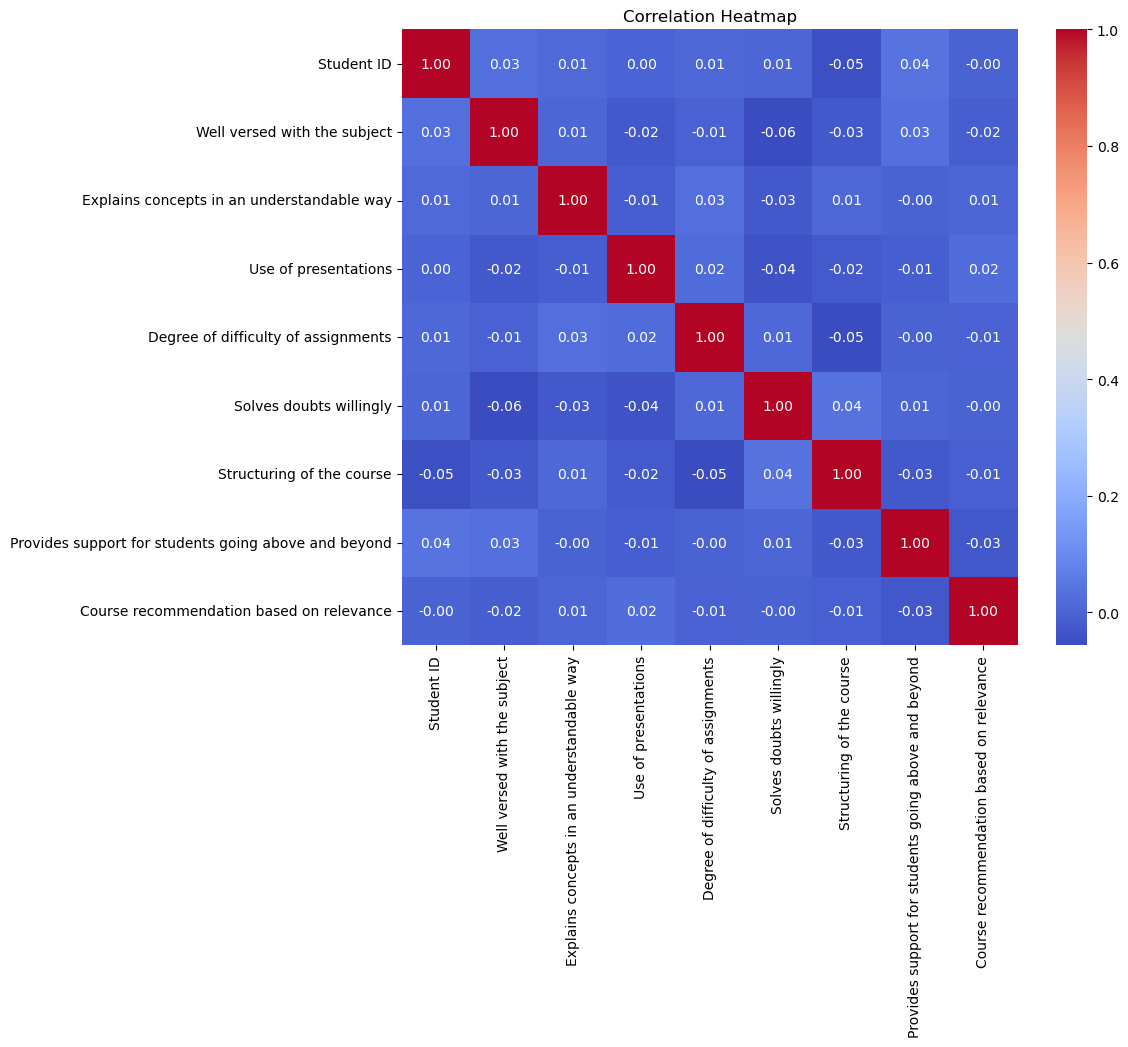

In [5]:
corr_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', square = True, fmt ='.2f')
plt.title('Correlation Heatmap')
plt.show()

## The Dataset

In [15]:
df

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9
...,...,...,...,...,...,...,...,...,...
996,55,8,7,6,2,5,7,7,9
997,913,5,5,6,5,6,7,6,1
998,199,9,5,8,3,8,1,1,2
999,539,10,2,7,4,3,4,10,1


## To uncover the relationship between variables using correlation

In [25]:
corr = df['Well versed with the subject'].corr(df['Explains concepts in an understandable way'])
print('Correlation:', corr)

Correlation: 0.008916256428743524


## Distribution of Ratings

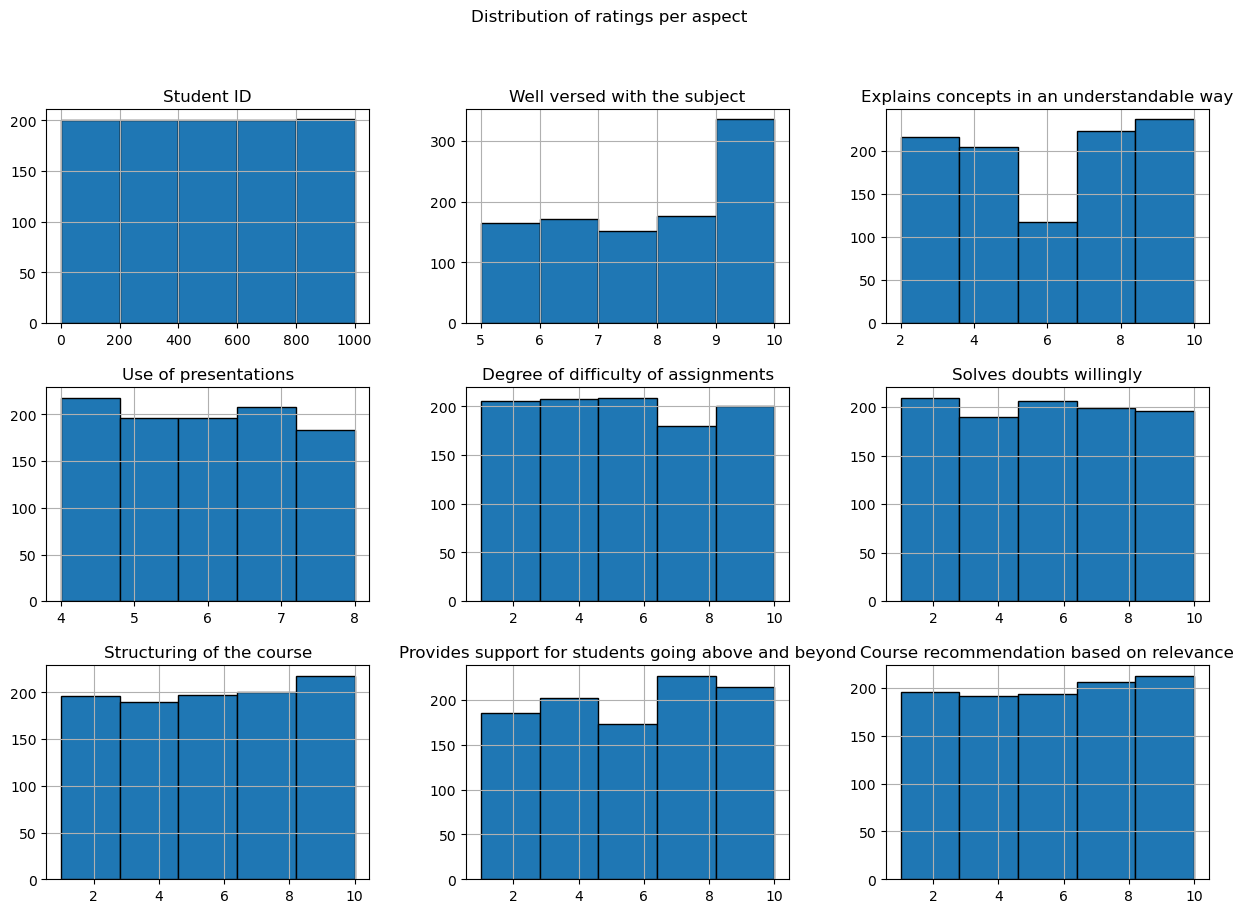

In [31]:
df.hist(figsize =(15,10), bins = 5, edgecolor = 'black')
plt.suptitle('Distribution of ratings per aspect')
plt.show()

## To calculate the average satisfaction score for each variable and visualizing the scores


Overall Satisfaction Summary:
 count    1001.000000
mean       60.813742
std        32.146522
min         4.111111
25%        33.111111
50%        60.777778
75%        88.555556
max       117.777778
Name: Overall_Satisfaction, dtype: float64


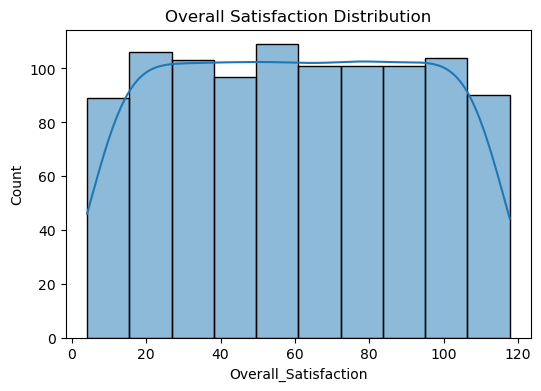

In [11]:
df['Overall_Satisfaction'] = df.mean(axis =1)
print('\nOverall Satisfaction Summary:\n', df['Overall_Satisfaction'].describe())
plt.figure(figsize = (6,4))
sns.histplot(df['Overall_Satisfaction'], bins = 10, kde = True)
plt.title('Overall Satisfaction Distribution')
plt.show()

## Average Scores

<function matplotlib.pyplot.show(close=None, block=None)>

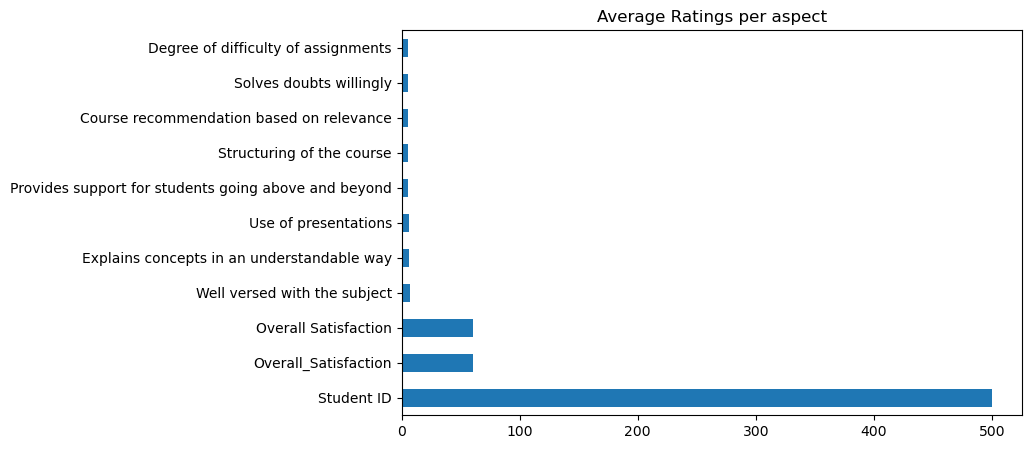

In [27]:
avg_scores = df.mean().sort_values(ascending = False)
avg_scores.plot(kind  ='barh', figsize =(8,5))
plt.title('Average Ratings per aspect')
plt.show

## Improvement Area based on Lowest Rated Aspect

In [28]:
lowest_aspect = avg_scores.idxmin()
print("Lowest rated aspect:", lowest_aspect)

Lowest rated aspect: Degree of difficulty of assignments
